# Exercise 2

Group Members: Luis Pazos Clemens, Robert Freund, Eugen Dizer

Deadline: 08.12.2020, 16:00.

In [1]:
#Load standard libraries
import numpy as np   
import matplotlib.pyplot as plt   
%matplotlib inline

## 3 Data Preparation

### 3.1 Dimension Reduction

In [2]:
#load library and data
from sklearn import datasets

digits = datasets.load_digits()
print ( digits.keys () )
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]
print ( data.dtype )

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
float64


In [3]:
#size of total dataset
print(np.shape(data))
print(np.shape(images))
print(np.shape(target))

(1797, 64)
(1797, 8, 8)
(1797,)


In [4]:
#plit into training and test set
from sklearn import model_selection
X_train , X_test , Y_train , Y_test =\
model_selection.train_test_split( digits .data , digits . target , test_size = 0.4 , random_state = 0)

In [5]:
#reduce to numbers "1" and "7" only
X_train_1_7  = X_train[np.where((Y_train == 1) | (Y_train == 7))]
Y_train_1_7 = Y_train[np.where((Y_train == 1) | (Y_train == 7))]
X_test_1_7 = X_test[np.where((Y_test == 1) | (Y_test == 7))]
Y_test_1_7 = Y_test[np.where((Y_test == 1) | (Y_test == 7))]

In [6]:
#size of datasets with number "1" and "7" only
print(np.shape(X_train_1_7))
print(np.shape(Y_train_1_7))
print(np.shape(X_test_1_7))
print(np.shape(Y_test_1_7))

(223, 64)
(223,)
(138, 64)
(138,)


<Figure size 432x288 with 0 Axes>

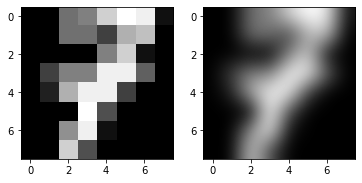

In [7]:
#plotting an test image

img = images[7]
assert 2 == len( img.shape )
plt.figure ()
plt.gray ()
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img, interpolation ="nearest" )
axarr[1].imshow(img, interpolation ="bicubic")
plt.show ()

In [8]:
#reduce the datasets to two dimension

#Rule of how to reduce the dataset
def reduce_rule():
    """
    Rule of how to reduce the dataset

    params
    ------
    None

    returns
    -------
    2 arrays: (D) array
                    Written "True", where we want to add up the entries of the Dataset. Otherwise false
    """
    #here we add up the first and third line and insert there "True". Otherwise "False"
    first_line_sum = np.concatenate((np.zeros(0*8,dtype=bool),np.ones(1*8,dtype=bool),np.zeros(7*8,dtype=bool)))
    third_line_sum = np.concatenate((np.zeros(2*8,dtype=bool),np.ones(1*8,dtype=bool),np.zeros(5*8,dtype=bool)))
    return first_line_sum,third_line_sum


def reduce_dim(dataset):
    """
    Reduces the Dataset by summing up entries of the dataset in two different manners.

    params
    ------
    dataset: (N,D) array
            dataset with all features of datapoint in one row

    returns
    -------
    res: (N,2) array
          dataset with only two features left written in one row
    """
    #get the reduction rule
    first_line_sum, fourth_line_sum = reduce_rule()
    #here we add up the first and fourth line of the pictures.
    #The sum over the first line should give a high value for "7" because of the location of the upper bar. The values of "1" should be smaller.
    #The sum over the third line should give a higher value for "1" because of the bar coming down from the top. The values o"7" should be smaller.
    res = np.reshape(np.add.reduce(dataset,axis=1,where=first_line_sum),(np.shape(dataset)[0],1))
    res = np.concatenate((res,np.reshape(np.add.reduce(dataset,axis=1,where=fourth_line_sum),(np.shape(dataset)[0],1))),axis=1)
    return res

In [9]:
#reduce training and test set
X_train_1_7_red = reduce_dim(X_train_1_7)
X_test_1_7_red = reduce_dim(X_test_1_7)

### 3.2 Scatterplot

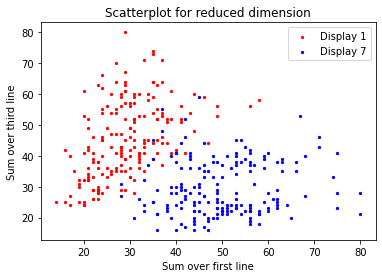

In [10]:
#plot the Training and Test set and give the different colors for "1" and "7"
plt.scatter(X_train_1_7_red[np.where(Y_train_1_7==1),0],X_train_1_7_red[np.where(Y_train_1_7==1),1],s=5,color="r",label="Display 1")
plt.scatter(X_train_1_7_red[np.where(Y_train_1_7==7),0],X_train_1_7_red[np.where(Y_train_1_7==7),1],s=5,color="b",label="Display 7")
plt.scatter(X_test_1_7_red[np.where(Y_test_1_7==1),0],X_test_1_7_red[np.where(Y_test_1_7==1),1],s=5,color="r")
plt.scatter(X_test_1_7_red[np.where(Y_test_1_7==7),0],X_test_1_7_red[np.where(Y_test_1_7==7),1],s=5,color="b")
plt.legend()
plt.xlabel("Sum over first line")
plt.ylabel("Sum over third line")
plt.title("Scatterplot for reduced dimension")
plt.show()

## 4. Nearest Mean

### 4.1  Implement the nearest mean classifier

In [11]:
#nearest mean function
def nearest_mean (training_features, training_labels, test_features):
    """
    Reduces the Dataset by summing up entries of the dataset in two different manners.

    params
    ------
    training_features: (N,D) array
                      dataset for training with all features of datapoint in one row
    training_labels: (N) array
                    contains labels of training dataset
    test_features: (N,D)
                  dataset for testing with all features of datapoint in one row
    returns
    -------
    res: (N) array
          contains classified labels of test dataset in the order of the test dataset
    """
    #calculating seperate means of first and second sum for "1" of the training dataset
    mean_feat_1 = np.mean(training_features[np.where(training_labels==1)],axis=0)
    #calculating seperate means of first and second sum for "7" of the training dataset
    mean_feat_7 = np.mean(training_features[np.where(training_labels==7)],axis=0)

    #Print the mean to plot it
    print("Mean of 1:",mean_feat_1)
    print("Mean of 7:",mean_feat_7)

    #write the two means in a array of length of the test dataset
    mean_feat_1_full = np.full((np.shape(test_features)[0],2),mean_feat_1)
    mean_feat_7_full = np.full((np.shape(test_features)[0],2),mean_feat_7)

    #calculate the distance from the mean of "1" for all test datset points with an euclidean metric
    dist_1 = np.sqrt(np.sum(np.square(np.subtract(test_features,mean_feat_1_full)),axis=1))
    #calculate the distance from the mean of "7" for all test datset points
    dist_7 = np.sqrt(np.sum(np.square(np.subtract(test_features,mean_feat_7_full)),axis=1))

    res = np.full(np.shape(test_features)[0],7)
    #for distance to mean of "1" smaller than distance of mean to "7" write a "1"
    res[dist_1<dist_7] = 1

    return res

### 4.2 Visualize the decision regions

Mean of 1: [29.77981651 46.0733945 ]
Mean of 7: [49.62280702 29.83333333]


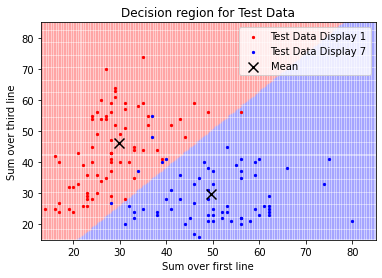

In [12]:
#produce Grid
x_1d = np.linspace(13,85,201)
y_1d = np.linspace(15,85,201)
x_2d, y_2d = np.meshgrid(x_1d, y_1d)

#Shape it such that it fits into the nearest_mean function
x_2d_new = np.reshape(x_2d,(201*201,1))
y_2d_new = np.reshape(y_2d,(201*201,1))
tmp = np.concatenate((x_2d_new,y_2d_new),axis=1)

#reshape nearest_mean result to fit into pcolormesh
z_2d = np.reshape(nearest_mean(X_train_1_7_red,Y_train_1_7,tmp),(201,201))

#plot test data and an overlay of the decision regions
plt.figure()
plt.pcolormesh(x_2d, y_2d, z_2d,alpha=0.1,cmap="bwr_r")
plt.scatter(X_test_1_7_red[np.where(Y_test_1_7==1),0],X_test_1_7_red[np.where(Y_test_1_7==1),1],s=5,color="r",label="Test Data Display 1")
plt.scatter(X_test_1_7_red[np.where(Y_test_1_7==7),0],X_test_1_7_red[np.where(Y_test_1_7==7),1],s=5,color="b",label="Test Data Display 7")

#Read off the Mean values and plot them
plt.scatter(29.7798,46.07339,s=100,marker="x",color="k", label="Mean")
plt.scatter(49.62280702,29.83333333,s=100,marker="x",color="k")

plt.legend()
plt.xlabel("Sum over first line")
plt.ylabel("Sum over third line")
plt.title("Decision region for Test Data")
plt.show()

## 5. QDA

### 5.1 Implement QDA Training

In [13]:
def fit_qda(training_features, training_labels):
    """
    QDA fit function for arbitrary training size N and feature dimension D.

    params
    ------
    training_features : np.array shape=(N, D)
            training set for the classifier.
            rows: features x_i.
    training_labels : np.array shape=(N)
        Training labels for the classifier with "1" and "7".

    returns
    -------
    mu: np.array shape=(2, D)
        the two class means.
    covmat: np.array shape=(2, D, D)
        the two covariance matrices.
    p: np.array shape=(2)
        the two priors.
    """
    N = len(training_labels)
    #Sets that only contain class 1 and 7
    X0 = training_features[training_labels == 1]
    X1 = training_features[training_labels == 7]
    N0 = len(X0)
    N1 = len(X1)
    #Calculate the means
    mu_0 = np.mean(X0, axis=0)
    mu_1 = np.mean(X1, axis=0)
    #Calculate covariance matrices
    covmat_0 = np.matmul((X0 - mu_0).T, (X0 - mu_0)) / N0
    covmat_1 = np.matmul((X1 - mu_1).T, (X1 - mu_1)) / N1
    #Calculate the priors
    p_0 = N0 / N
    p_1 = N1 / N
    return np.array([mu_0, mu_1]), np.array([covmat_0, covmat_1]), np.array([p_0, p_1])

In [14]:
#Apply this function to our training data from task 3.1
training_features = X_train_1_7_red
training_labels = Y_train_1_7

mu, covmat, p = fit_qda(training_features, training_labels)

### 5.2  Implement QDA Prediction

In [15]:
def predict_qda(mu, covmat, p, test_features):
    """
    QDA prediction function for arbitrary test size N and feature dimension D.

    params
    ------
    mu, covmat, p : np.arrays
        see above.
    test_features : np.array shape=(M, D)
        test features for the classifier.

    returns
    -------
    predicted_labels: np.array shape=(M)
        "1" or "7".
    """
    b = np.log(np.linalg.det(2*np.pi*covmat)) / 2 - np.log(p)
    y0 = np.sum((test_features-mu[0]) * np.matmul(np.linalg.inv(covmat[0]), (test_features-mu[0]).T).T, axis=1) / 2 + b[0]
    y1 = np.sum((test_features-mu[1]) * np.matmul(np.linalg.inv(covmat[1]), (test_features-mu[1]).T).T, axis=1) / 2 + b[1]
    prediction = np.ones(len(y0))
    prediction[y0 > y1] = 7
    return prediction

In [16]:
predicted_labels_test = predict_qda(mu, covmat, p, X_test_1_7_red)
predicted_labels_train = predict_qda(mu, covmat, p, X_train_1_7_red)

def calc_error_rate(predicted_labels, right_labels):
    return 100 * (1 - np.count_nonzero(predicted_labels == right_labels) / len(predicted_labels))

#Y_test_1_7[Y_test_1_7 == 1] = 0
#Y_test_1_7[Y_test_1_7 == 7] = 1
#Since now we predict if it's "1" or "7"!

print("Error rate on the test set is ", calc_error_rate(predicted_labels_test, Y_test_1_7), "%")
print("Error rate on the training set is ", calc_error_rate(predicted_labels_train, training_labels), "%")

Error rate on the test set is  3.6231884057971064 %
Error rate on the training set is  5.381165919282516 %


### 5.3 Visualization 

The Gaussian distribution in two dimensions can be written into:
$\frac{1}{\sqrt{(2 \pi)^2 det(\Sigma)}} exp((x-\mu)^T \Sigma^{-1} (x-\mu)) = \frac{1}{\sqrt{(2 \pi)^2 det(\Sigma)}} exp(\frac{1}{det(\Sigma)}[\sigma_y^2(x-\mu_x)^2-2\sigma_{xy}(x-\mu_x)(y-\mu_y)+\sigma_x^2(y-\mu_y)^2])$



In [17]:
#2D gaussian explained above
def gaussian_2D(x,y,mean,sigma):
    determinant = sigma[0,0]*sigma[1,1]-sigma[1,0]**2
    N = np.sqrt((2*np.pi)**2*determinant)
    gaussian = np.exp(-(sigma[1,1]*(x-mean[0])**2-2*sigma[1,0]*(y-mean[1])*(x-mean[0])+sigma[0,0]*(y-mean[1])**2)/(2*determinant))/N
    return gaussian

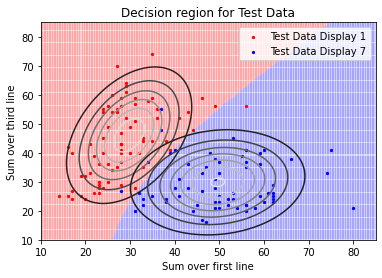

In [18]:
#produce Grid
x_1d = np.linspace(10,85,201)
y_1d = np.linspace(10,85,201)
x_2d, y_2d = np.meshgrid(x_1d, y_1d)

#Shape it such that it fits into the nearest_mean function
x_2d_new = np.reshape(x_2d,(201*201,1))
y_2d_new = np.reshape(y_2d,(201*201,1))
tmp = np.concatenate((x_2d_new,y_2d_new),axis=1)

#reshape nearest_mean result to fit into pcolormesh
z_2d = np.reshape(predict_qda(mu, covmat, p, tmp),(201,201))


#grid_vector = np.array([x_2d,y_2d])

gaussian_1 = gaussian_2D(x_2d,y_2d,mu[0],covmat[0])
gaussian_7 = gaussian_2D(x_2d,y_2d,mu[1],covmat[1])

#plot test data and an overlay of the decision regions
plt.figure()
plt.pcolormesh(x_2d, y_2d, z_2d,alpha=0.1,cmap="bwr_r")
plt.contour(x_2d, y_2d, gaussian_1)
plt.contour(x_2d, y_2d, gaussian_7)
plt.scatter(X_test_1_7_red[np.where(Y_test_1_7==1),0],X_test_1_7_red[np.where(Y_test_1_7==1),1],s=5,color="r",label="Test Data Display 1")
plt.scatter(X_test_1_7_red[np.where(Y_test_1_7==7),0],X_test_1_7_red[np.where(Y_test_1_7==7),1],s=5,color="b",label="Test Data Display 7")

#plt.scatter(29.7798,46.07339,s=100,marker="x",color="k", label="Mean")
#plt.scatter(49.62280702,29.83333333,s=100,marker="x",color="k")
plt.legend()
plt.xlabel("Sum over first line")
plt.ylabel("Sum over third line")
plt.title("Decision region for Test Data")
plt.show()

In [19]:
#Eigenvalue/Eigenvector decomposition of the covariance matrices
eigvals, eigvecs = np.linalg.eig(covmat)

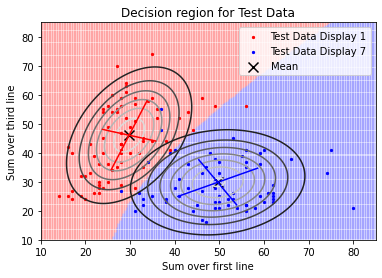

In [20]:
plt.figure()
plt.pcolormesh(x_2d, y_2d, z_2d,alpha=0.1,cmap="bwr_r")
plt.scatter(X_test_1_7_red[np.where(Y_test_1_7==1),0],X_test_1_7_red[np.where(Y_test_1_7==1),1],s=5,color="r",label="Test Data Display 1")
plt.scatter(X_test_1_7_red[np.where(Y_test_1_7==7),0],X_test_1_7_red[np.where(Y_test_1_7==7),1],s=5,color="b",label="Test Data Display 7")
plt.scatter(mu[0][0],mu[0][1],s=100,marker="x",color="k", label="Mean")
plt.scatter(mu[1][0],mu[1][1],s=100,marker="x",color="k")
plt.contour(x_2d, y_2d, gaussian_1)
plt.contour(x_2d, y_2d, gaussian_7)
a = mu[0] + np.sqrt(eigvals[0][0]) * eigvecs[0].T[0]
b = mu[0] - np.sqrt(eigvals[0][0]) * eigvecs[0].T[0]
plt.plot([a[0],b[0]], [a[1],b[1]], color="r")
a = mu[0] + np.sqrt(eigvals[0][1]) * eigvecs[0].T[1]
b = mu[0] - np.sqrt(eigvals[0][1]) * eigvecs[0].T[1]
plt.plot([a[0],b[0]], [a[1],b[1]], color="r")
a = mu[1] + np.sqrt(eigvals[1][0]) * eigvecs[1].T[0]
b = mu[1] - np.sqrt(eigvals[1][0]) * eigvecs[1].T[0]
plt.plot([a[0],b[0]], [a[1],b[1]], color="b")
a = mu[1] + np.sqrt(eigvals[1][1]) * eigvecs[1].T[1]
b = mu[1] - np.sqrt(eigvals[1][1]) * eigvecs[1].T[1]
plt.plot([a[0],b[0]], [a[1],b[1]], color="b")
plt.legend()
plt.xlabel("Sum over first line")
plt.ylabel("Sum over third line")
plt.title("Decision region for Test Data")
plt.show()

### 5.4 Performance evaluation

In [21]:
from sklearn.model_selection import KFold

#Apply k-fold cross-validation to the QDA classifier
def cross_validate(k_folds):

    error_rates = []
    kf = KFold(k_folds)

    for train_id, test_id in kf.split(Y_train_1_7):
        # construct train and test set from folds
        X_train = X_train_1_7_red[train_id]
        X_test = X_train_1_7_red[test_id]
        y_train = Y_train_1_7[train_id]
        y_test = Y_train_1_7[test_id]

        # run our qda classifier and calculate error rate
        mu, covmat, p = fit_qda(X_train, y_train)
        result = predict_qda(mu, covmat, p, X_test)
        error_rates.append(100 * (1 - np.count_nonzero(result == y_test) / len(result)))

    return [np.mean(error_rates), np.std(error_rates)]

In [22]:
mean, std = cross_validate(10)

print("Error rate: %0.2f (+/- %0.2f)" % (mean, std), "%")

Error rate: 5.81 (+/- 3.44) %


## 6. LDA

6.1 Implement LDA Training

In [23]:
def fit_lda(training_features, training_labels):
    """
    LDA fit function for arbitrary training size N and feature dimension D.

    params
    ------
    training_features : np.array shape=(N, D)
            training set for the classifier.
            rows: features x_i.
    training_labels : np.array shape=(N)
       Training labels for the classifier with "1" and "7".

    returns
    -------
    mu: np.array shape=(2, D)
        the two class means.
    WCcovmat: np.array shape=(2, D)
        the within-class covariance matrix.
    p: np.array shape=(2)                                
        the two priors.
    """
    N = len(training_labels)
    #Sets that only contain class 1 and 7
    X0 = training_features[training_labels == 1]
    X1 = training_features[training_labels == 7]
    X = np.concatenate((X0,X1))
    N0 = len(X0)
    N1 = len(X1)
    #Calculate the means
    mu_0 = np.mean(X0, axis=0)
    mu_1 = np.mean(X1, axis=0)
    mu = np.concatenate((np.tile(mu_0,(N0,1)),np.tile(mu_1,(N1,1))))
    #Calculate within-class covariance matrix
    WCcovmat = np.matmul((X - mu).T, (X - mu)) / N
    #Calculate the priors
    p_0 = N0 / N
    p_1 = N1 / N
    return np.array([mu_0, mu_1]), np.array(WCcovmat), np.array([p_0, p_1])

In [24]:
#Apply this function to our training data from task 3.1
training_features = X_train_1_7_red
training_labels = Y_train_1_7

mu, WCcovmat, p = fit_lda(training_features, training_labels)

6.2  Implement LDA Prediction

In [25]:
# predict_lda - b is calculated using WCcovmat and mu:

def predict_lda(mu, WCcovmat, p, test_features):
    """
    LDA prediction function for arbitrary test size N and feature dimension D.

    params
    ------
    mu, WCcovmat, p : np.arrays
        see above.
    test_features : np.array shape=(M, D)
        test features for the classifier.

    returns
    -------
    predicted_labels: np.array shape=(M)
        "1" or "7".
    """
    #b = (np.log(np.linalg.det(2*np.pi*WCcovmat)) / 2 - np.log(p)) + (( np.matmul(mu, np.matmul(np.linalg.inv(np.tile(WCcovmat,(2,1,1))), mu.T).T))  / 2 )
    b0 = (np.log(np.linalg.det(2*np.pi*WCcovmat)) / 2 - np.log(p[0])) + (( np.matmul(mu[0], np.matmul(np.linalg.inv(WCcovmat), mu[0].T).T))  / 2 )
    b1 = (np.log(np.linalg.det(2*np.pi*WCcovmat)) / 2 - np.log(p[1])) + (( np.matmul(mu[1], np.matmul(np.linalg.inv(WCcovmat), mu[1].T).T))  / 2 )

    w = np.matmul(np.atleast_2d((mu[1]-mu[0])), np.linalg.inv(WCcovmat))

    B = b0 - b1
    print("b = ", B)

    y = np.ndarray.flatten(np.sign(np.matmul(np.atleast_2d(w), test_features.T).T + B))

    prediction = np.ones(len(y))
    prediction[y > 0] = 7 
    return prediction

In [26]:
predicted_labels_test = predict_lda(mu, WCcovmat, p, X_test_1_7_red)
predicted_labels_train = predict_lda(mu, WCcovmat, p, X_train_1_7_red)

def calc_error_rate(predicted_labels, right_labels):
    return 100 * (1 - np.count_nonzero(predicted_labels == right_labels) / len(predicted_labels))

#Y_test_1_7[Y_test_1_7 == 1] = 0
#Y_test_1_7[Y_test_1_7 == 7] = 1
#Since now we predict if it's "1" or "7"!

print("Error rate on the test set is ", calc_error_rate(predicted_labels_test, Y_test_1_7), "%")
print("Error rate on the training set is ", calc_error_rate(predicted_labels_train, training_labels), "%")

b =  -5.07803212599876
b =  -5.07803212599876
Error rate on the test set is  5.072463768115942 %
Error rate on the training set is  5.381165919282516 %


In [27]:
# predict_lda - b is left as a free parameter to be chosen such that the error on the training set is minimized for w x.T + b :

def predict_lda2(mu, WCcovmat, p, test_features, b):
    """
    LDA prediction function for arbitrary test size N and feature dimension D.

    params
    ------
    b : free integer parameter
    mu, WCcovmat, p : np.arrays
        see above.
    test_features : np.array shape=(M, D)
        test features for the classifier.

    returns
    -------
    predicted_labels: np.array shape=(M)
        "1" or "7".
    """
    w = np.matmul(np.atleast_2d((mu[1]-mu[0])), np.linalg.inv(WCcovmat))

    y = np.ndarray.flatten(np.sign(np.matmul(np.atleast_2d(w), test_features.T).T + b))

    prediction = np.ones(len(y))
    prediction[y > 0] = 7 
    return prediction

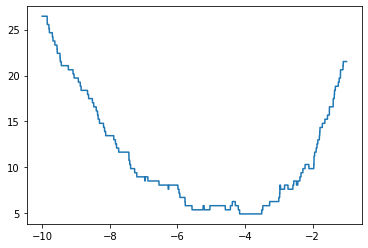

Error on the training set for w x.T + b is minimized when b =  -4.16389163891639


In [28]:
# Find value for b that minimizes w x.T + b in the training set

errors_tr = np.empty(100000)
samp = np.linspace(-10,-1,len(errors_tr))

def B_min(predicted_labels, right_labels):
    return 100 * (1 - np.count_nonzero(predicted_labels == right_labels) / len(predicted_labels))

  #Y_test_1_7[Y_test_1_7 == 1] = 0
  #Y_test_1_7[Y_test_1_7 == 7] = 1
  #Since now we predict if it's "1" or "7"!

for i in range(len(errors_tr)):
    predicted_labels_train = predict_lda2(mu, WCcovmat, p, X_train_1_7_red,samp[i]) 

    errors_tr[i] = calc_error_rate(predicted_labels_train, training_labels)

plt.plot(samp,errors_tr)
plt.show()

b_min = samp[np.argmin(errors_tr)]
print("Error on the training set for w x.T + b is minimized when b = ", b_min)

In [29]:
predicted_labels_test = predict_lda2(mu, WCcovmat, p, X_test_1_7_red, b_min)
predicted_labels_train = predict_lda2(mu, WCcovmat, p, X_train_1_7_red, b_min)

print("Error rate on the test set is ", calc_error_rate(predicted_labels_test, Y_test_1_7), "%")
print("Error rate on the training set is ", calc_error_rate(predicted_labels_train, training_labels), "%")

Error rate on the test set is  6.521739130434778 %
Error rate on the training set is  4.932735426008971 %


### 6.3 Visualization 

In [30]:
#2D gaussian explained above
def gaussian_2D(x,y,mean,sigma):
    determinant = sigma[0,0]*sigma[1,1]-sigma[1,0]**2
    N = np.sqrt((2*np.pi)**2*determinant)
    gaussian = np.exp(-(sigma[1,1]*(x-mean[0])**2-2*sigma[1,0]*(y-mean[1])*(x-mean[0])+sigma[0,0]*(y-mean[1])**2)/(2*determinant))/N
    return gaussian

b =  -5.07803212599876


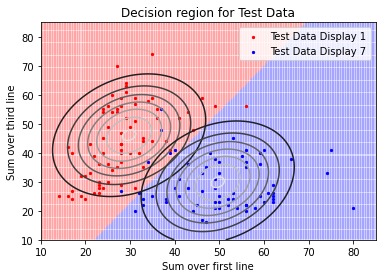

In [31]:
#produce Grid
x_1d = np.linspace(10,85,201)
y_1d = np.linspace(10,85,201)
x_2d, y_2d = np.meshgrid(x_1d, y_1d)

#Shape it such that it fits into the nearest_mean function
x_2d_new = np.reshape(x_2d,(201*201,1))
y_2d_new = np.reshape(y_2d,(201*201,1))
tmp = np.concatenate((x_2d_new,y_2d_new),axis=1)

#reshape nearest_mean result to fit into pcolormesh
z_2d = np.reshape(predict_lda(mu, WCcovmat, p, tmp),(201,201))  # use b_min


#grid_vector = np.array([x_2d,y_2d])

gaussian_1 = gaussian_2D(x_2d,y_2d,mu[0],WCcovmat)
gaussian_7 = gaussian_2D(x_2d,y_2d,mu[1],WCcovmat)

#plot test data and an overlay of the decision regions
plt.figure()
plt.pcolormesh(x_2d, y_2d, z_2d,alpha=0.1,cmap="bwr_r")
plt.contour(x_2d, y_2d, gaussian_1)
plt.contour(x_2d, y_2d, gaussian_7)
plt.scatter(X_test_1_7_red[np.where(Y_test_1_7==1),0],X_test_1_7_red[np.where(Y_test_1_7==1),1],s=5,color="r",label="Test Data Display 1")
plt.scatter(X_test_1_7_red[np.where(Y_test_1_7==7),0],X_test_1_7_red[np.where(Y_test_1_7==7),1],s=5,color="b",label="Test Data Display 7")

#plt.scatter(29.7798,46.07339,s=100,marker="x",color="k", label="Mean")
#plt.scatter(49.62280702,29.83333333,s=100,marker="x",color="k")
plt.legend()
plt.xlabel("Sum over first line")
plt.ylabel("Sum over third line")
plt.title("Decision region for Test Data")
plt.show()

In [32]:
#Eigenvalue/Eigenvector decomposition of the covariance matrices    
eigvals, eigvecs = np.linalg.eig(WCcovmat)


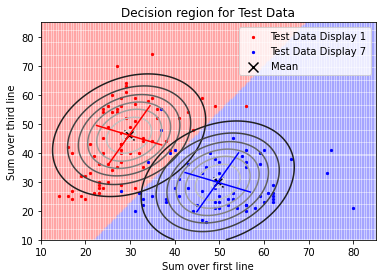

In [33]:
plt.figure()
plt.pcolormesh(x_2d, y_2d, z_2d,alpha=0.1,cmap="bwr_r")
plt.scatter(X_test_1_7_red[np.where(Y_test_1_7==1),0],X_test_1_7_red[np.where(Y_test_1_7==1),1],s=5,color="r",label="Test Data Display 1")
plt.scatter(X_test_1_7_red[np.where(Y_test_1_7==7),0],X_test_1_7_red[np.where(Y_test_1_7==7),1],s=5,color="b",label="Test Data Display 7")
plt.scatter(mu[0][0],mu[0][1],s=100,marker="x",color="k", label="Mean")
plt.scatter(mu[1][0],mu[1][1],s=100,marker="x",color="k")
plt.contour(x_2d, y_2d, gaussian_1)
plt.contour(x_2d, y_2d, gaussian_7)
a = mu[0] + np.sqrt(eigvals[0]) * eigvecs.T[0]
b = mu[0] - np.sqrt(eigvals[0]) * eigvecs.T[0]
plt.plot([a[0],b[0]], [a[1],b[1]], color="r")
a = mu[0] + np.sqrt(eigvals[1]) * eigvecs.T[1]
b = mu[0] - np.sqrt(eigvals[1]) * eigvecs.T[1]
plt.plot([a[0],b[0]], [a[1],b[1]], color="r")
a = mu[1] + np.sqrt(eigvals[0]) * eigvecs.T[0]
b = mu[1] - np.sqrt(eigvals[0]) * eigvecs.T[0]
plt.plot([a[0],b[0]], [a[1],b[1]], color="b")
a = mu[1] + np.sqrt(eigvals[1]) * eigvecs.T[1]
b = mu[1] - np.sqrt(eigvals[1]) * eigvecs.T[1]
plt.plot([a[0],b[0]], [a[1],b[1]], color="b")
plt.legend()
plt.xlabel("Sum over first line")
plt.ylabel("Sum over third line")
plt.title("Decision region for Test Data")
plt.show()

6.4 Performance evaluation

In [34]:
from sklearn.model_selection import KFold

#Apply k-fold cross-validation to the QDA classifier
def cross_validate(k_folds):

    error_rates = []
    kf = KFold(k_folds)

    for train_id, test_id in kf.split(Y_train_1_7):
        # construct train and test set from folds
        X_train = X_train_1_7_red[train_id]
        X_test = X_train_1_7_red[test_id]
        y_train = Y_train_1_7[train_id]
        y_test = Y_train_1_7[test_id]

        # run our lda classifier and calculate error rate
        mu, WCcovmat, p = fit_lda(X_train, y_train)
        result = predict_lda(mu, WCcovmat, p, X_test,)
        error_rates.append(100 * (1 - np.count_nonzero(result == y_test) / len(result)))

    return [np.mean(error_rates), np.std(error_rates)]

In [35]:
mean, std = cross_validate(10)

print("Error rate: %0.2f (+/- %0.2f)" % (mean, std), "%")

b =  -5.573076076796049
b =  -5.252257730079151
b =  -4.709444210243802
b =  -5.571522328063992
b =  -4.63128922078063
b =  -5.065536549293199
b =  -4.8798737766729765
b =  -5.825061031455711
b =  -4.517714731078794
b =  -4.927330412022627
Error rate: 5.40 (+/- 3.37) %
